# Name : Aniruddha Halder
# Reg : 2017331087

In [1]:
import matplotlib.pyplot as plt
import numpy as np


# A analog signal

In [32]:
fm = 2
t = np.arange(0,2,0.01)
A= 8
x = A*np.sin(2.0*np.pi*fm*t)

<function matplotlib.pyplot.show>

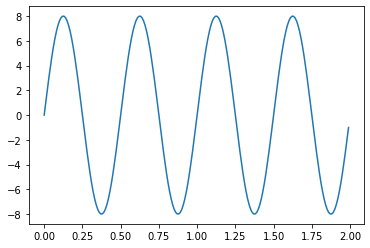

In [33]:
plt.plot(t,x)
plt.show

# Sampling of signal

In [34]:
n = 18
fs = n*fm
ts = np.arange(0,2, 1/fs)

In [35]:

xs = A*np.sin(2*np.pi*fm*ts)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  """Entry point for launching an IPython kernel.


<function matplotlib.pyplot.show>

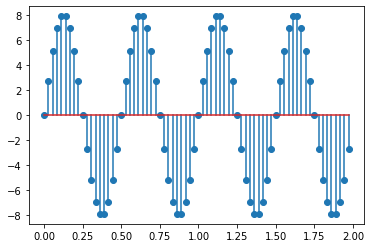

<Figure size 1440x1080 with 0 Axes>

In [36]:
plt.stem(ts, xs)
plt.figure(figsize=(20,15))
plt.show

# Quantization of sampled signal

In [47]:
b_bit = 3
L = 2 ** b_bit
vmax=A;
vmin=-vmax;
delta=(vmax-vmin)/L;
partition = np.arange(vmin, vmax, delta)
codec= np.arange(vmin-(delta/2),vmax+(delta/2), delta) 



In [48]:
xq = np.copy(xs)
encode = np.copy(xs)

for i in range(len(partition)):
  left = codec[i]
  right = codec[i + 1]
  for j in range(len(xs)):
    # left <= xs[i] < right
    if(i != len(partition) - 1 and left <= xs[j] and xs[j] < right):
      xq[j] = partition[i]
      encode[j] = i
    # left <= xs[i], only for last portion
    if(i == len(partition) - 1 and left <= xs[j]):
      xq[j] = partition[i]
      encode[j] = i


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  after removing the cwd from sys.path.


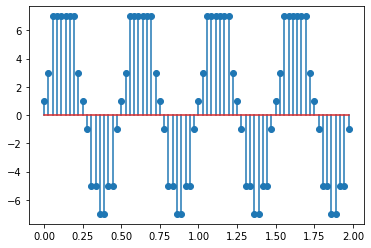

In [49]:
for i in range(len(xq)):
    xq[i] = xq[i] + (delta / 2) 

plt.stem(ts, xq)
plt.show()

# Encoding the signal to digital signal

In [44]:
print(encode)

[4. 5. 7. 7. 7. 7. 7. 7. 5. 4. 3. 1. 1. 0. 0. 1. 1. 3. 4. 5. 7. 7. 7. 7.
 7. 7. 5. 4. 3. 1. 1. 0. 0. 1. 1. 3. 4. 5. 7. 7. 7. 7. 7. 7. 5. 4. 3. 1.
 1. 0. 0. 1. 1. 3. 4. 5. 7. 7. 7. 7. 7. 7. 5. 4. 3. 1. 1. 0. 0. 1. 1. 3.]


In [50]:
def decimalToBinary(val, bit):
    binary = "{0:b}".format(int(val))
    if(len(binary) > bit):
      return binary
    extra_zero = bit - len(binary)
    return extra_zero * "0" + binary

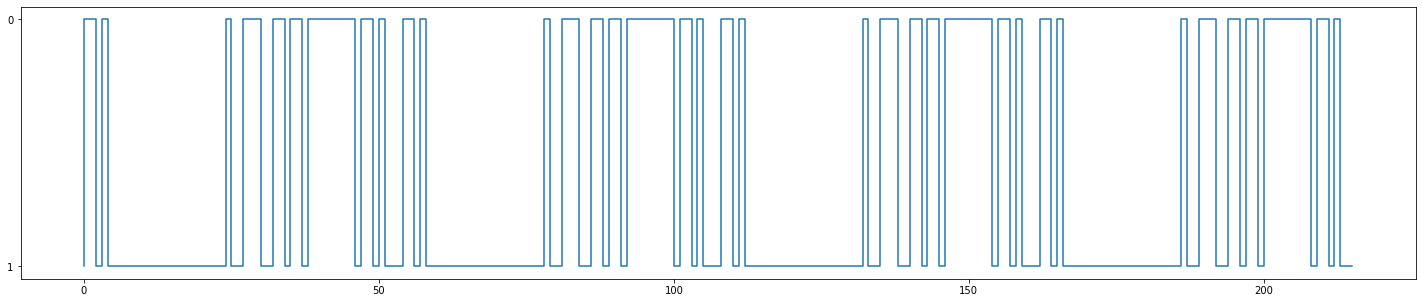

In [55]:
binary_code = []
for i in range(len(encode)):
  binary = decimalToBinary(encode[i], b_bit)
  for j in range(len(binary)):
    binary_code.append(binary[j])

pos = np.arange(len(binary_code))
plt.figure(figsize=(25, 5))
#plt.ylim(-1, 2)
plt.step(pos, binary_code)
plt.show()

In [56]:
print(binary_code)

['1', '0', '0', '1', '0', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '0', '1', '1', '0', '0', '0', '1', '1', '0', '0', '1', '0', '0', '1', '0', '0', '0', '0', '0', '0', '0', '0', '1', '0', '0', '1', '0', '1', '1', '1', '0', '0', '1', '0', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '0', '1', '1', '0', '0', '0', '1', '1', '0', '0', '1', '0', '0', '1', '0', '0', '0', '0', '0', '0', '0', '0', '1', '0', '0', '1', '0', '1', '1', '1', '0', '0', '1', '0', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '0', '1', '1', '0', '0', '0', '1', '1', '0', '0', '1', '0', '0', '1', '0', '0', '0', '0', '0', '0', '0', '0', '1', '0', '0', '1', '0', '1', '1', '1', '0', '0', '1', '0', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '0', '1', '1', '0', '0', '0', '1', '1', '0', '0', '1', '0', '0',